# Imports

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess
import numpy as np

In [3]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string, print_subprocess_results

# EnergyPlus Simulation

In [48]:
idf_file_relative = Path("./test/CEA_idf.idf")
weather_file_path = Path("C:\EnergyPlusV22-1-0\WeatherData\epw.CWEC_2020_QC\CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw")
output_relative_directory='./sim'

In [49]:
import os, shutil

folder = output_relative_directory='./sim'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [50]:
result = subprocess.run([f"energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_path}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )

In [51]:
print_subprocess_results(result)

---ARGS---
 ['energyplus', '--readvars', '--output-directory', './sim', '--weather', 'C:\\EnergyPlusV22-1-0\\WeatherData\\epw.CWEC_2020_QC\\CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw', 'test\\CEA_idf.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2023.02.16 10:23
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Starting Simulation at 01/01/2006 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=01/21/2006
Continuing Simulation at 01/21/2006 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=02/10/2006
Continuing Simulation at 02/10/2006 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=03/02/2006
Continuing Simulation at 03/02/2006 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=03/22/2006
Continuing Simu

# Results

In [4]:
df=pd.read_csv("./sim/eplusout.csv",
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string
              )

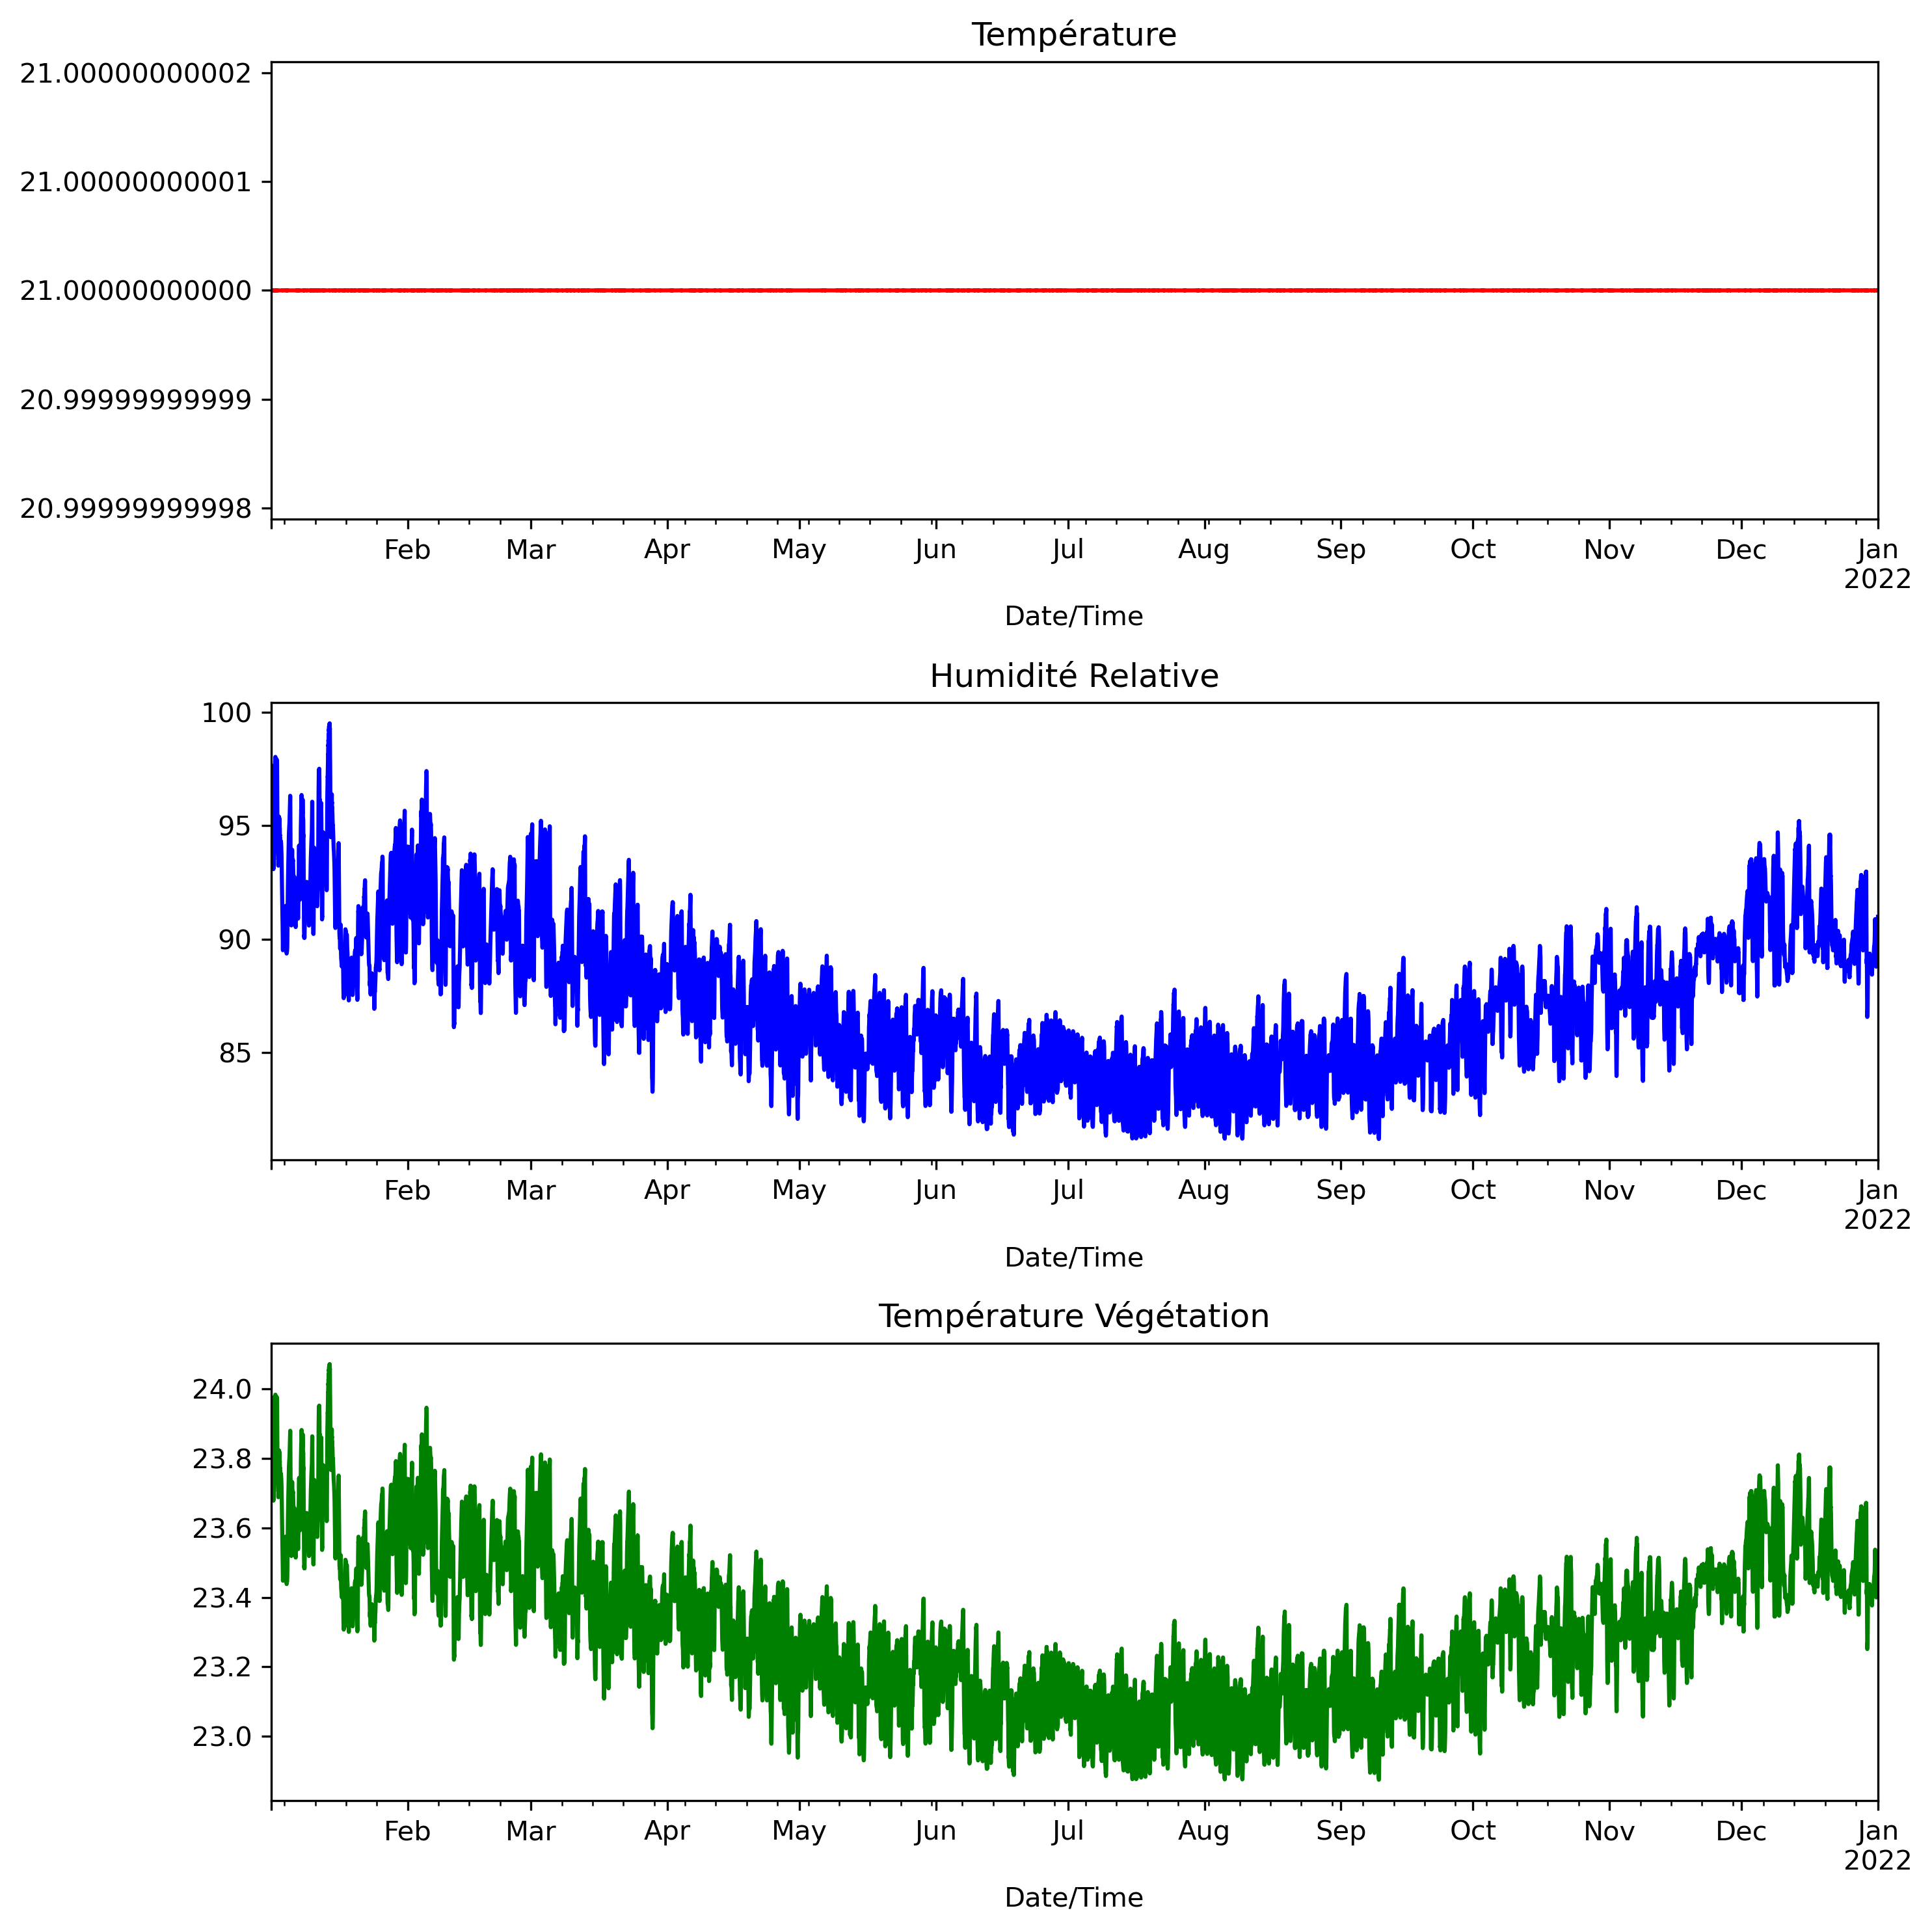

In [5]:
fig, ax = plt.subplots(3,1,figsize = (10,10),dpi=300)
ax[0].ticklabel_format(useOffset=False)
ax[0].set_title("Température")
ax[1].set_title("Humidité Relative")
ax[2].set_title("Température Végétation")
df['THERMAL ZONE 1:Zone Air Temperature [C](TimeStep)'].plot(ax=ax[0], color='red')
df['THERMAL ZONE 1:Zone Air Relative Humidity [%](TimeStep)'].plot(ax=ax[1], color='blue')
df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"].plot(ax=ax[2], color='green')
plt.tight_layout()
plt.show()

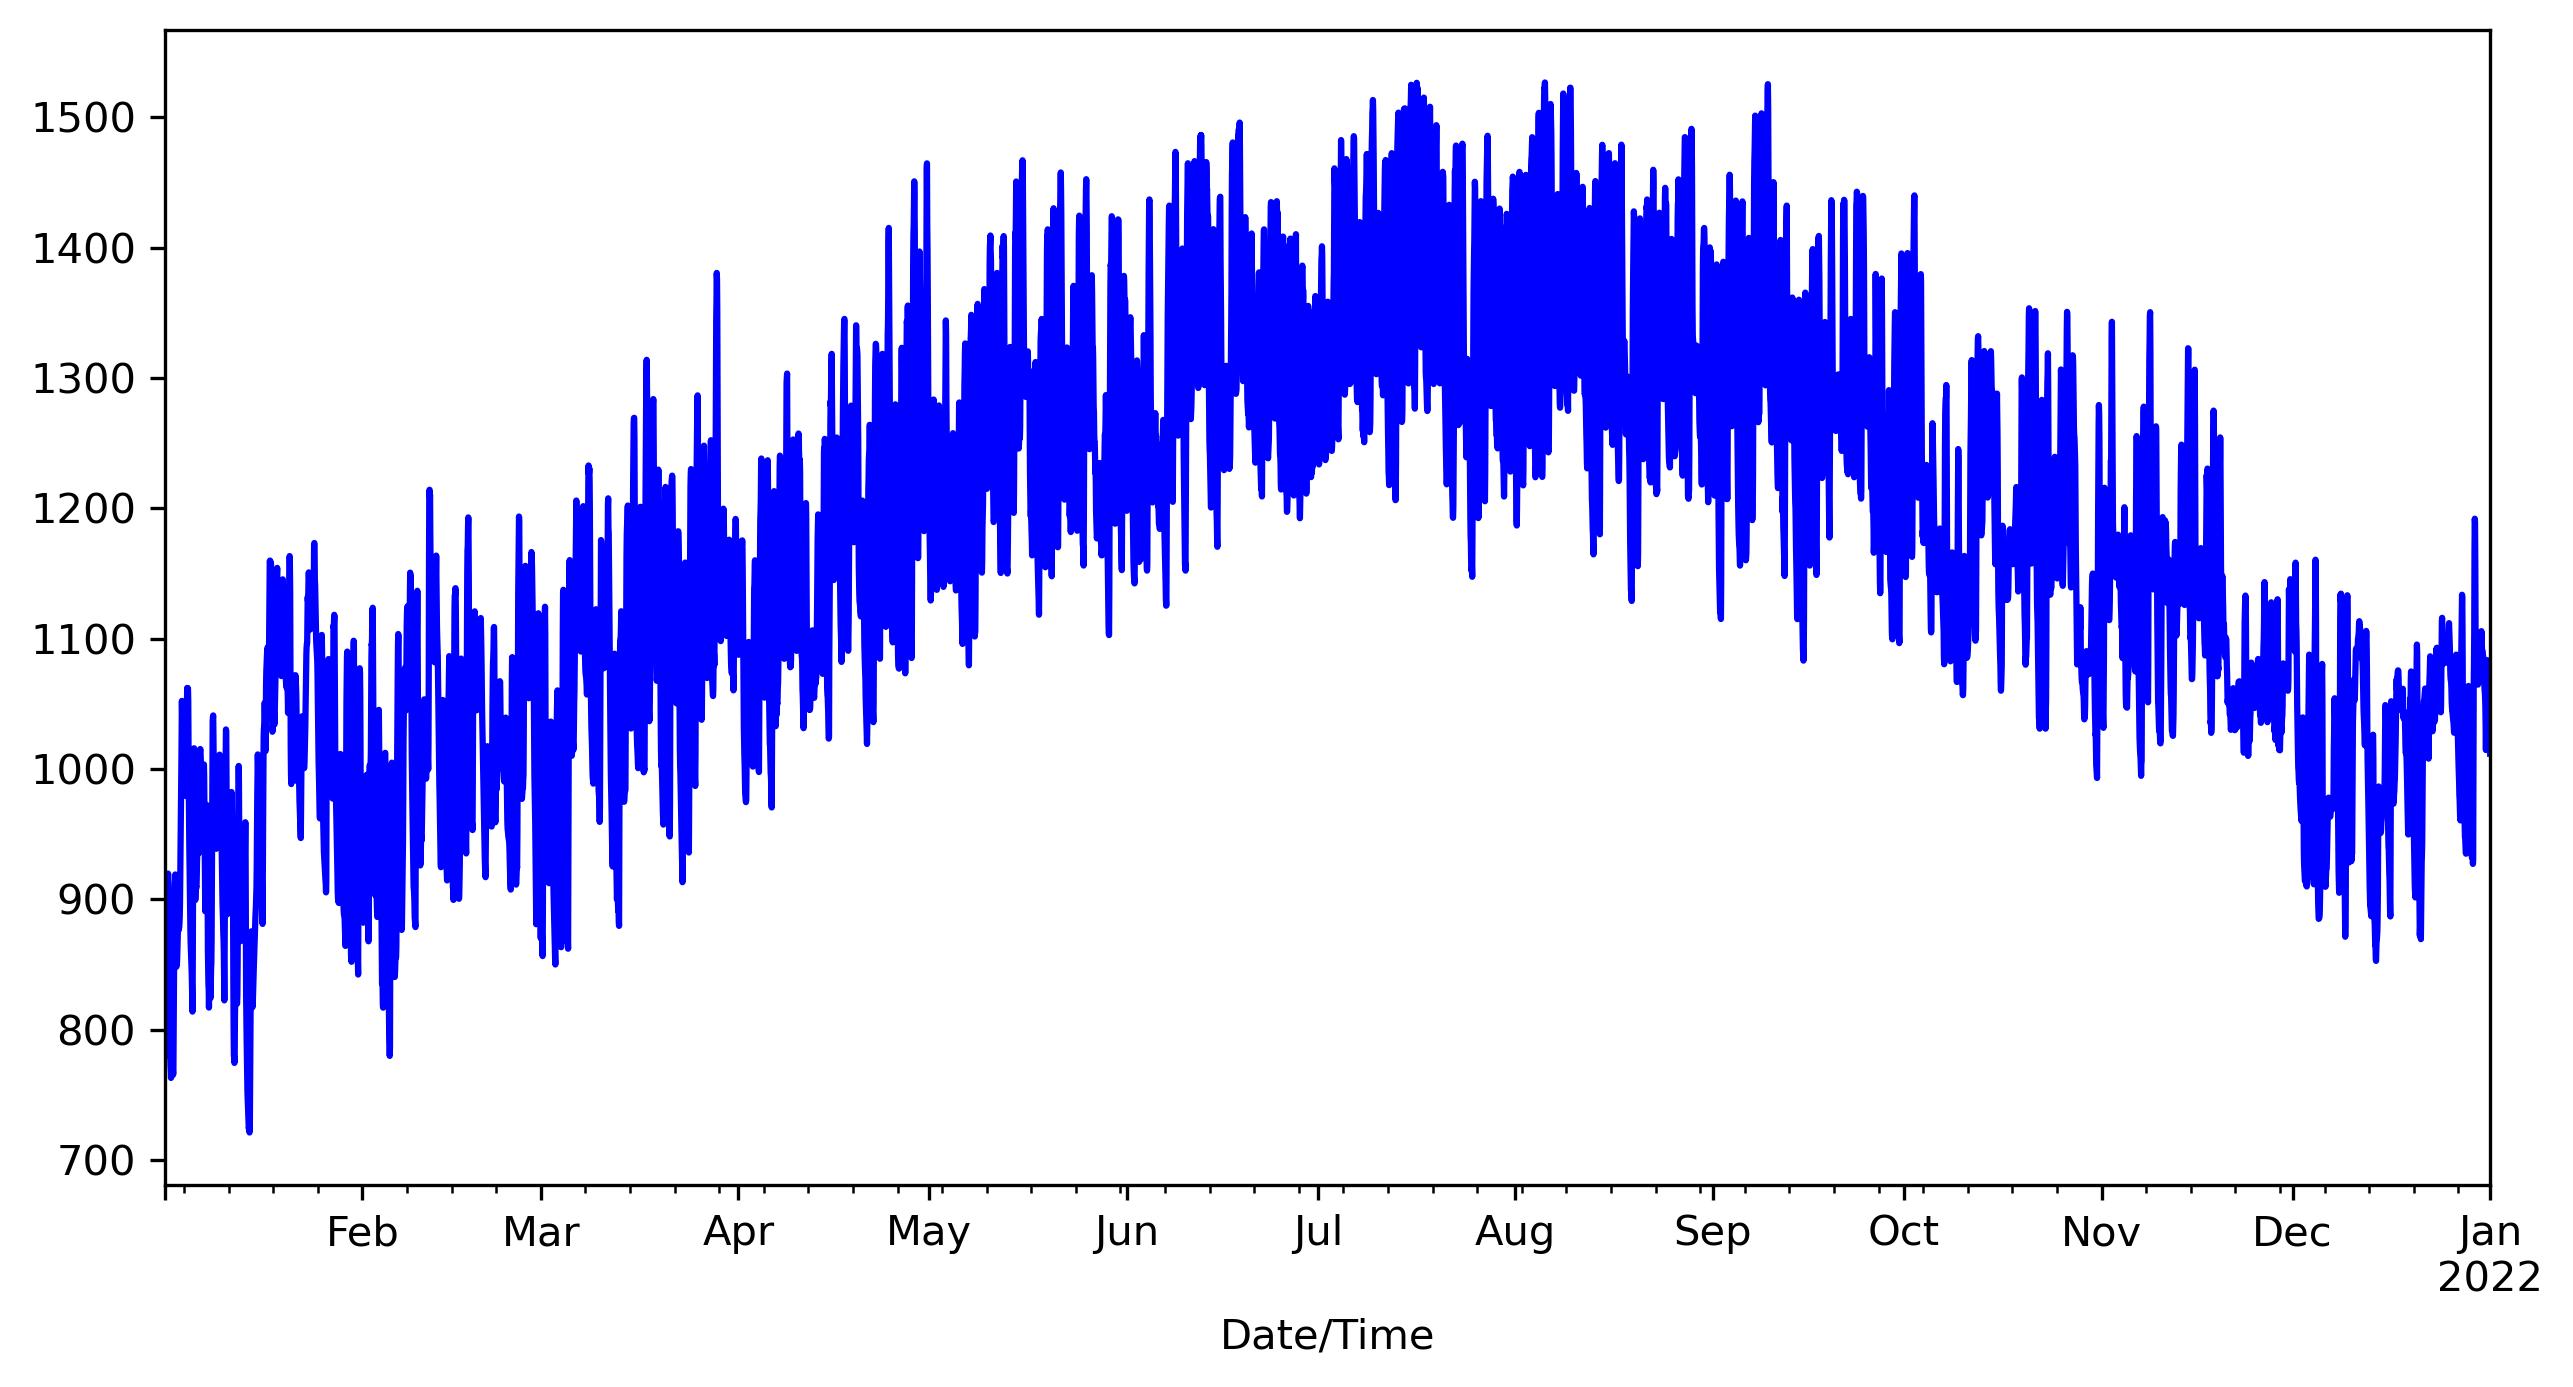

In [6]:
fig, ax = plt.subplots(1,1,figsize = (10,5),dpi=300)
(df["DistrictCooling:Facility [J](Hourly)"].dropna()/1000).plot(ax=ax, color="blue")
# df["DistrictHeating:Facility [J](Hourly) "].plot(ax=ax[1], color="red")
plt.show()

In [17]:
df_trnsys = pd.read_csv(r"C:\Users\Gilbert\PycharmProjects\Doc_Art2\plants.plt",encoding= 'unicode_escape')
df_trnsys = df_trnsys.iloc[2:,:].astype(float)
df_trnsys.index = df.index
list(df_trnsys)

[' TIME                                   ',
 'q_sens_w                                ',
 'q_lat_w                                 ',
 't_veg                                   ',
 'Unnamed: 4']

C:\Users\Gilbert\AppData\Local\Temp\ipykernel_17144\3699046668.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(x_labels)
C:\Users\Gilbert\AppData\Local\Temp\ipykernel_17144\3699046668.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x_labels)


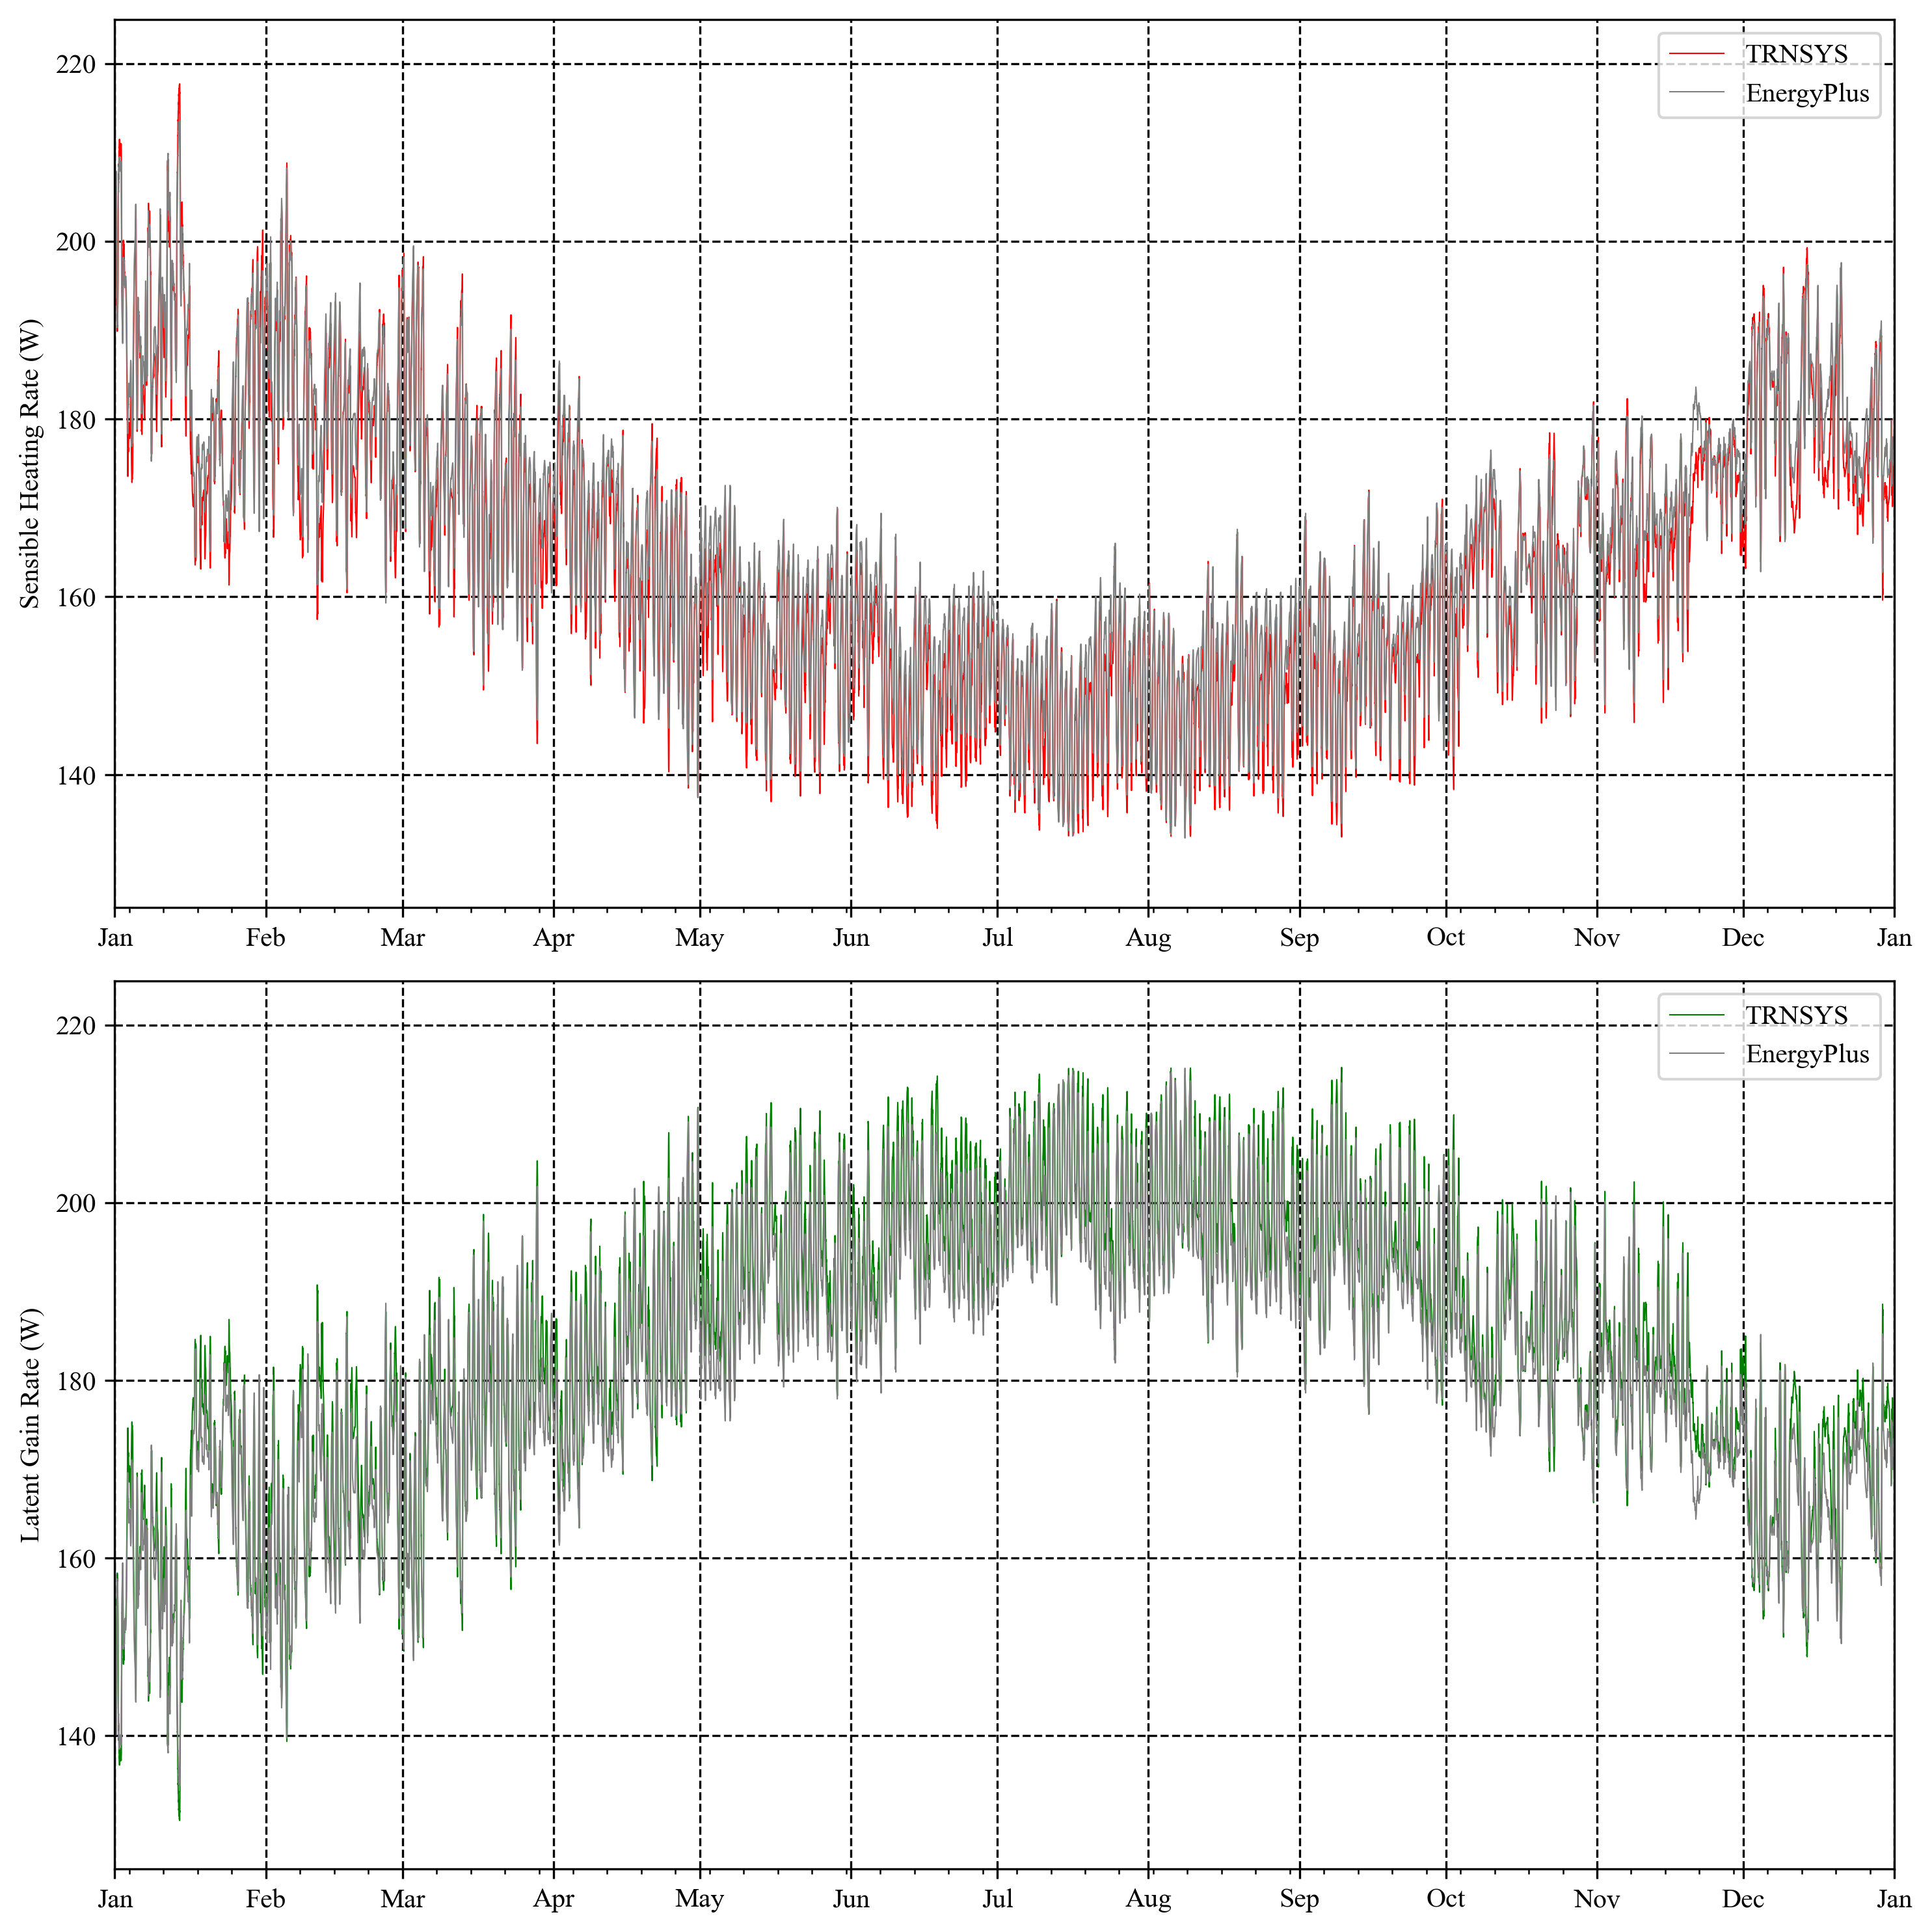

In [69]:
from matplotlib.pyplot import Text

fig, ax = plt.subplots(2,1,figsize = (10,10),dpi=300)

x_labels = [Text(26824330, 0, 'Jan'),
 Text(26868960, 0, 'Feb'),
 Text(26909280, 0, 'Mar'),
 Text(26953920, 0, 'Apr'),
 Text(26997120, 0, 'May'),
 Text(27041760, 0, 'Jun'),
 Text(27084960, 0, 'Jul'),
 Text(27129600, 0, 'Aug'),
 Text(27174240, 0, 'Sep'),
 Text(27217440, 0, 'Oct'),
 Text(27262080, 0, 'Nov'),
 Text(27305280, 0, 'Dec'),
 Text(27349920, 0, 'Jan')]

# df['THERMAL ZONE 1:Zone Other Equipment Radiant Heating Rate [W](TimeStep)'].plot(ax=ax[0], color="blue")
df['THERMAL ZONE 1:Zone Other Equipment Convective Heating Rate [W](TimeStep)'].plot(ax=ax[0], color="red",linewidth=0.5)
df_trnsys['q_sens_w                                '].plot(ax=ax[0], color="grey",linewidth=0.5)
df['THERMAL ZONE 1:Zone Other Equipment Latent Gain Rate [W](TimeStep)'].plot(ax=ax[1], color="green",linewidth=0.5)
df_trnsys['q_lat_w                                 '].plot(ax=ax[1], color="grey", linewidth=0.5)
ax[0].set_ylabel("Sensible Heating Rate (W)")
ax[1].set_ylabel("Latent Gain Rate (W)")
ax[0].set_xticklabels(x_labels)
ax[1].set_xticklabels(x_labels)
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylim([125,225])
ax[1].set_ylim([125,225])
ax[0].legend(["TRNSYS","EnergyPlus"])
ax[1].legend(["TRNSYS","EnergyPlus"])
ax[0].grid(color="k", linestyle='--')
ax[1].grid(color="k", linestyle='--')
plt.tight_layout()
plt.savefig("comp.png")
plt.show()


In [65]:
ax[0].get_xticklabels()

[Text(26824330, 0, ''),
 Text(26868960, 0, 'Feb'),
 Text(26909280, 0, 'Mar'),
 Text(26953920, 0, 'Apr'),
 Text(26997120, 0, 'May'),
 Text(27041760, 0, 'Jun'),
 Text(27084960, 0, 'Jul'),
 Text(27129600, 0, 'Aug'),
 Text(27174240, 0, 'Sep'),
 Text(27217440, 0, 'Oct'),
 Text(27262080, 0, 'Nov'),
 Text(27305280, 0, 'Dec'),
 Text(27349920, 0, 'Jan\n2022')]

In [78]:
import numpy as np
nmbe = np.sum(df['THERMAL ZONE 1:Zone Other Equipment Latent Gain Rate [W](TimeStep)'].values - df_trnsys['q_lat_w                                 '].values)/((df_trnsys['q_lat_w                                 '].values.shape[0])*np.mean(df_trnsys['q_lat_w                                 '].values))*100
nmbe

1.0216584890431302

In [80]:
cvrmse = 100*np.sqrt(np.sum(np.square(df['THERMAL ZONE 1:Zone Other Equipment Latent Gain Rate [W](TimeStep)'].values- df_trnsys['q_lat_w                                 '].values))/(df_trnsys['q_lat_w                                 '].values.shape[0]-1))/np.mean(df_trnsys['q_lat_w                                 '].values)
cvrmse

1.6648415187938321

In [81]:
nmbe = np.sum(df['THERMAL ZONE 1:Zone Other Equipment Convective Heating Rate [W](TimeStep)'].values - df_trnsys['q_sens_w                                '].values)/((df_trnsys['q_sens_w                                '].values.shape[0])*np.mean(df_trnsys['q_sens_w                                '].values))*100
nmbe

-0.9979056022513736

In [82]:
cvrmse = 100*np.sqrt(np.sum(np.square(df['THERMAL ZONE 1:Zone Other Equipment Convective Heating Rate [W](TimeStep)'].values- df_trnsys['q_sens_w                                '].values))/(df_trnsys['q_sens_w                                '].values.shape[0]-1))/np.mean(df_trnsys['q_sens_w                                '].values)
cvrmse

1.7603769972653804

In [85]:
import numpy as np
trnsys_data = pd.read_csv(r"C:\Users\Gilbert\PycharmProjects\Doc_Art2\ref_qlat2.txt",sep='\t', skiprows=1, usecols=[1,2], skipfooter=23, engine="python", dtype=np.float64)

In [86]:
a = trnsys_data.iloc[:,0].apply(lambda x: x*-1000)
b = trnsys_data.iloc[:,1].apply(lambda x: x*1000)
c = pd.read_csv("t_veg.txt",names=["time","temp",1], sep="\t", index_col=0).drop(1,axis=1)
c = c.iloc[1:,:]
c.index = df.index

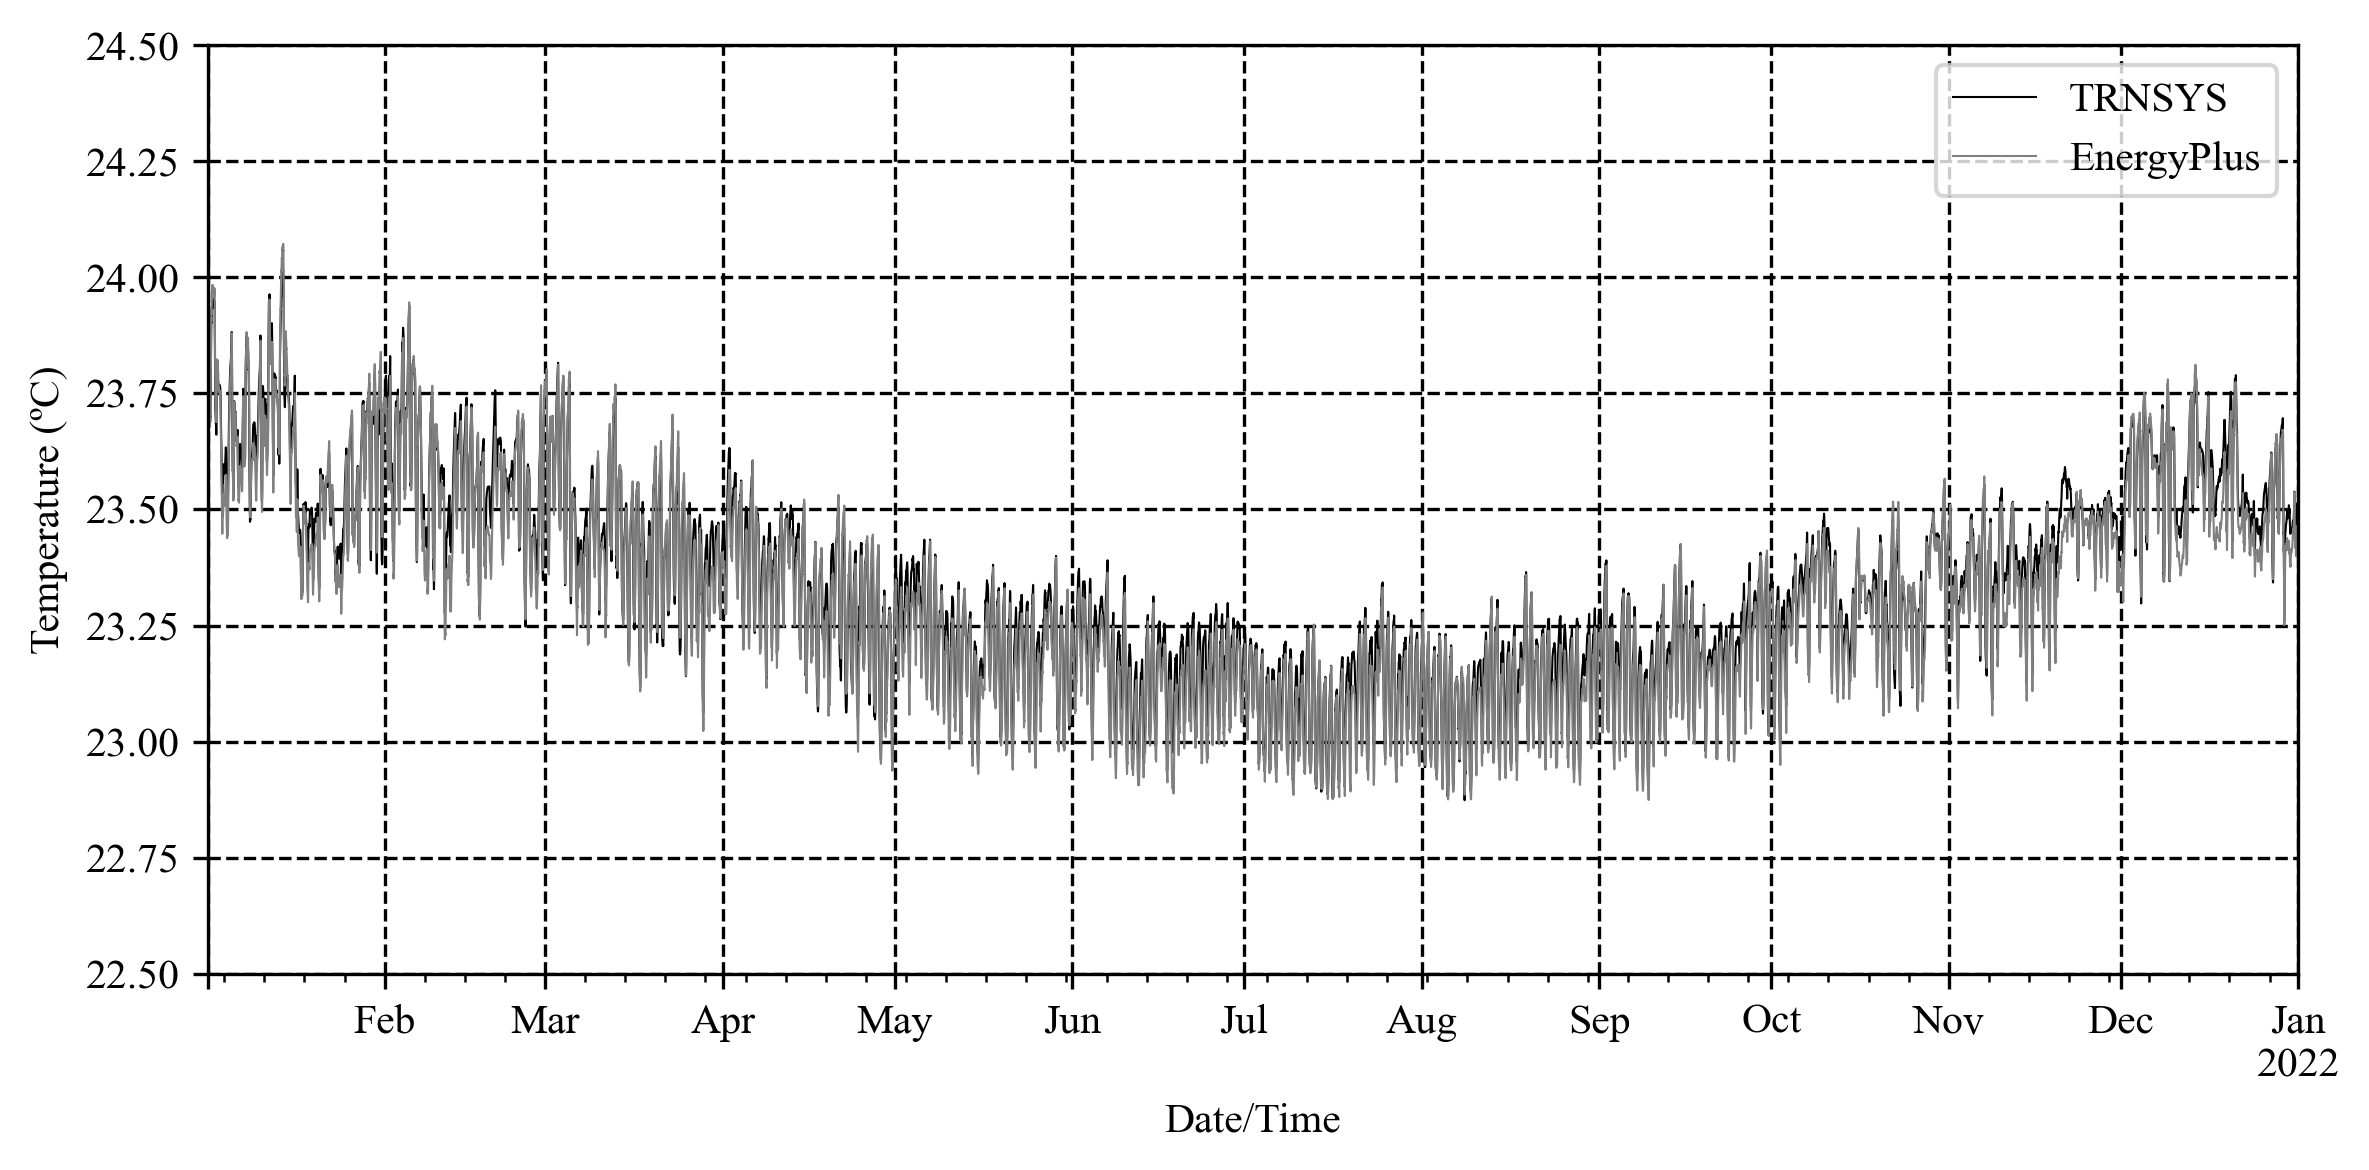

In [58]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

fig, ax = plt.subplots(1,1,figsize = (8,4),dpi=300)
ax.ticklabel_format(useOffset=False)
df_trnsys['t_veg                                   '][20:].plot(ax=ax, color="k",linewidth=0.5)
ax.set_ylabel("Temperature (ºC)")
df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].plot(ax=ax,color='grey',linewidth=0.5)
plt.legend(["TRNSYS","EnergyPlus"])
ax.set_ylim([22.5,24.5])
plt.tight_layout()
ax.grid(color="k", linestyle='--')
plt.savefig("comp.png")

In [36]:
dd = df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values - df_trnsys['t_veg                                   '][20:].values
y_hat = df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values
y = df_trnsys['t_veg                                   '].values

In [37]:
nmbe = np.sum(df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values - df_trnsys['t_veg                                   '][20:].values)/((y.shape[0]-1)*np.mean(y))*100
nmbe

-0.10642200986213257

In [38]:
cvrmse = 100*np.sqrt(np.sum(np.square(df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values - df_trnsys['t_veg                                   '][20:].values))/(y.shape[0]-1))/np.mean(y)
cvrmse

0.16549724069237934

In [40]:
dd = dd[20:]
pd.DataFrame(dd).describe()

,0
count,52520.000000
mean,-0.024839
std,0.029581
min,-0.144337
25%,-0.043826
50%,-0.024118
75%,-0.005167
max,0.103131


In [49]:
np.max(np.abs(df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values - df_trnsys['t_veg                                   '][20:].values))

0.14433659158805412

In [52]:
import math
MSE = np.square(np.subtract(df_trnsys['t_veg                                   '][20:].values,df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"][20:].values)).mean()
RMSE = math.sqrt(MSE)
RMSE

0.03862537231381606

<AxesSubplot: >

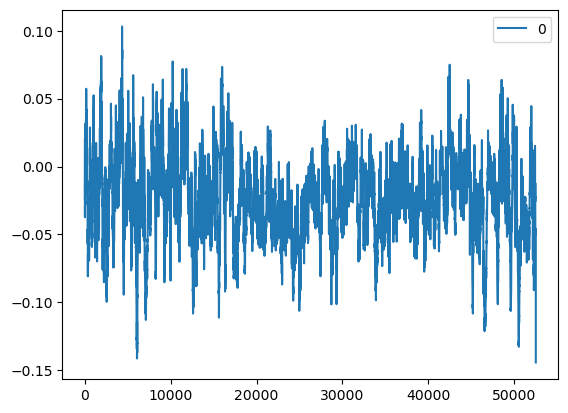

In [41]:
pd.DataFrame(dd.reshape(-1,1)).plot()

In [47]:
from scipy.stats import anderson
res = anderson(dd)
res

AndersonResult(statistic=38.67619535681297, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

<Figure size 1200x800 with 0 Axes>

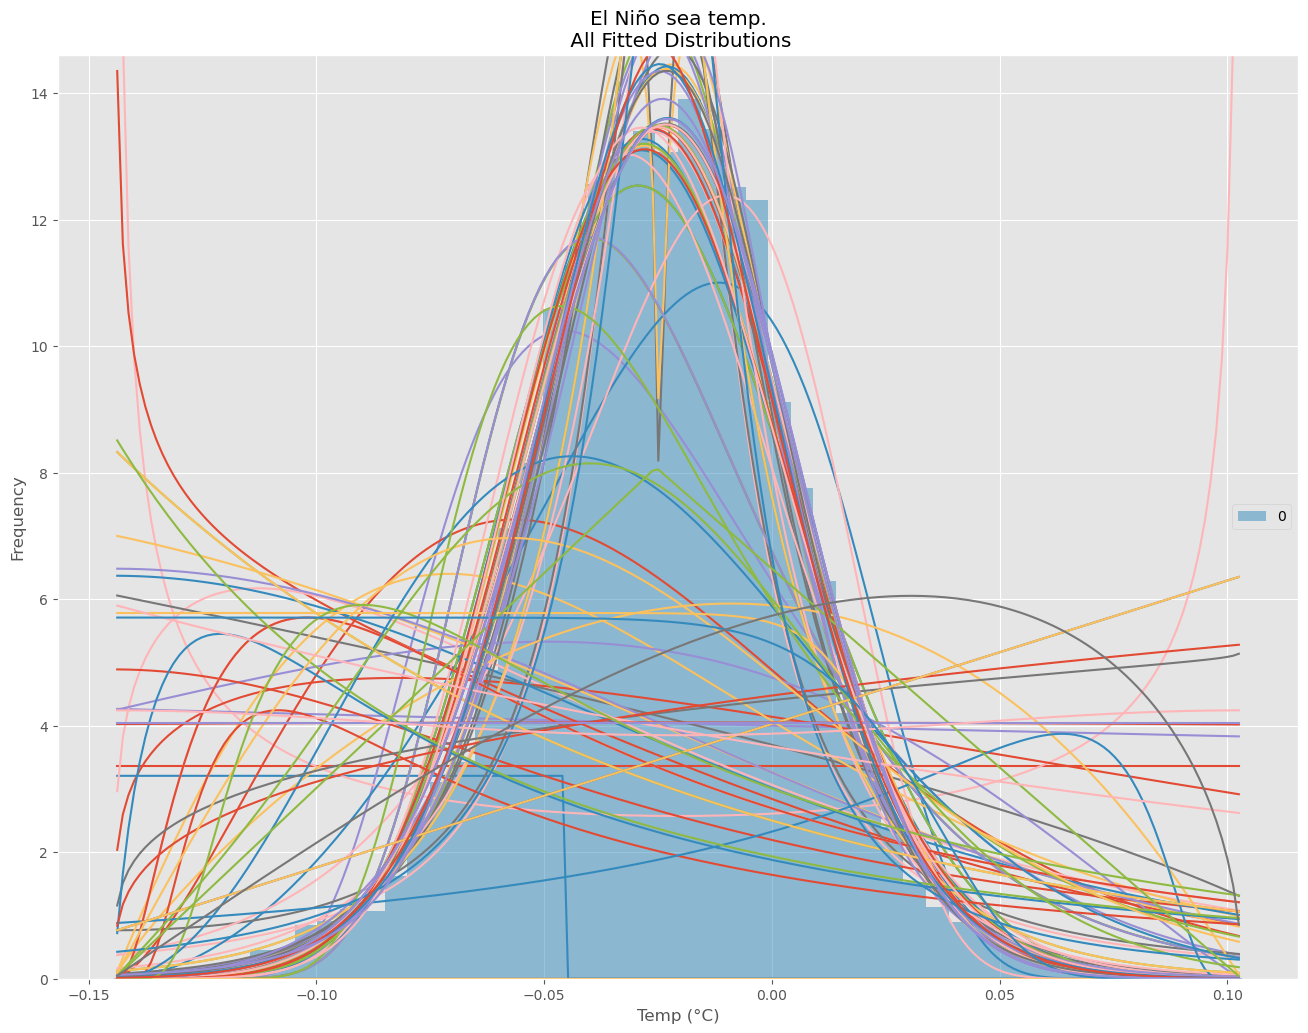

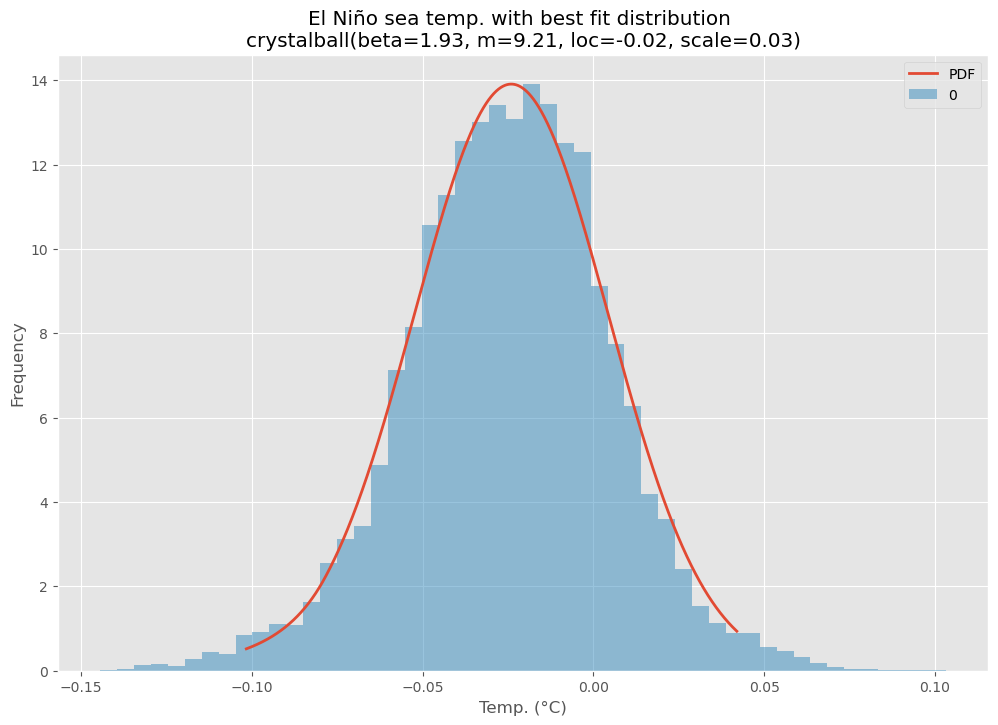

In [42]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.DataFrame(dd.reshape(-1,1))

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')